# Plotting the 10 most important variables
### Parker Christenson 
### MSAAI 510

These variables are just what I think are the most important variables to plot...

`Link to the dataset: https://www.kaggle.com/c/home-credit-default-risk/data`

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import umap 

In [2]:
df = pd.read_csv('train_data.csv')

# also getting the cols of the df 

#df.columns

'''
So I was not able to get the cols using the df.columns method, so I used the extention sanddance to get the cols and view the data
think of it like a power query editor, but you get to write code in python. 
'''

'\nSo I was not able to get the cols using the df.columns method, so I used the extention sanddance to get the cols and view the data\nthink of it like a power query editor, but you get to write code in python. \n'

In [4]:
# getting the unique vals of the 'TARGET' col
df['TARGET'].unique()

# assuming that the 0 is "DENIED" and 1 is "APPROVED" changing the values into strings
df['TARGET'] = df['TARGET'].map({0:'DENIED', 1:'APPROVED'})

## `Plot 1`

In [5]:
# using plotly to graph the amount of approved and denied applications by the loan 'NAME_CONTRACT_TYPE' col
fig = px.histogram(df, x='NAME_CONTRACT_TYPE', color='TARGET', title='Loan Type vs Loan Approval')
fig.show()

## `Plot 2`

<Axes: xlabel='CODE_GENDER', ylabel='count'>

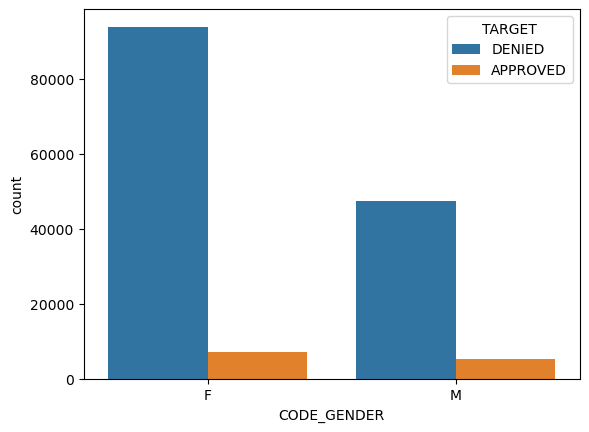

In [6]:
# using sns to plot the amount of approved loans by the CODE_Gender col
sns.countplot(x='CODE_GENDER', data=df, hue='TARGET')

## `Plot 3`

CNT_CHILDREN
0     107584
1      30670
2      13415
3       1811
4        210
5         44
6         10
7          4
12         2
19         2
14         1
11         1
9          1
Name: count, dtype: int64

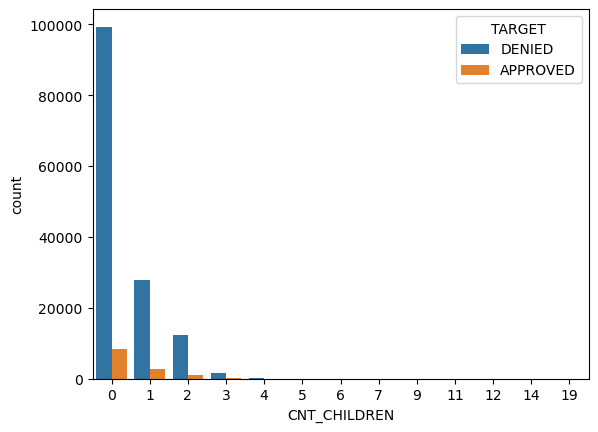

In [19]:
# using the 'CNT_CHILDREN' col to plot the amount of approved loans by the amount of children the applicant has
sns.countplot(x='CNT_CHILDREN', data=df, hue='TARGET')

# also printing out the unique count of the 'CNT_CHILDREN' col
df['CNT_CHILDREN'].value_counts()

## `Plot 4`

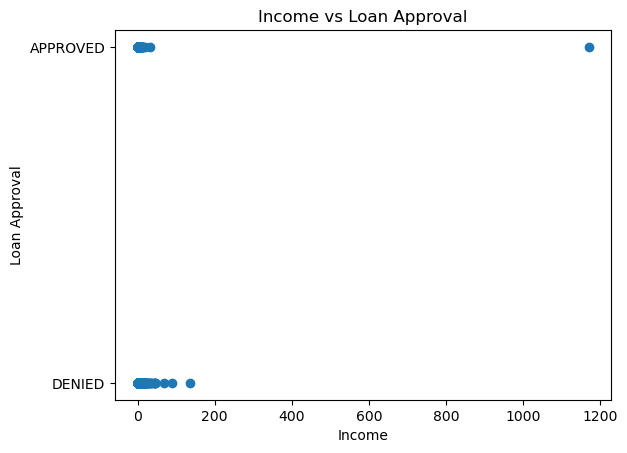

In [16]:

# creating a new col to group the 'AMT_INCOME_GROUP' by 100K increments
df['AMT_INCOME_GROUP'] = df['AMT_INCOME_TOTAL'] // 100000


plt.scatter(df['AMT_INCOME_GROUP'], df['TARGET'])
plt.xlabel('Income')
plt.ylabel('Loan Approval')
plt.title('Income vs Loan Approval')
plt.show()

## `Plot 5`

<Axes: xlabel='TARGET', ylabel='AMT_CREDIT'>

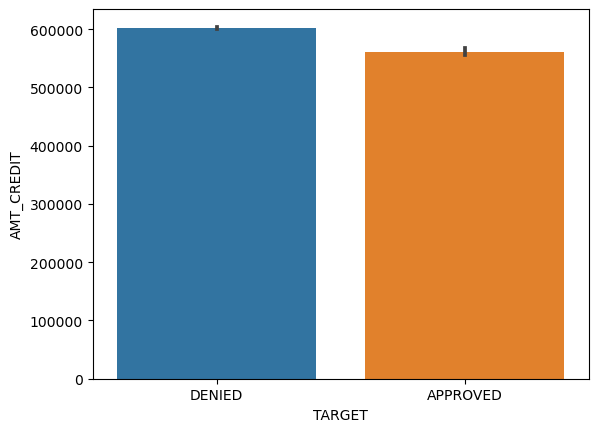

In [17]:
# bar plot based off what I am assuming is the credit limit which is the 'AMT_CREDIT' column
sns.barplot(x='TARGET', y='AMT_CREDIT', data=df)

## `Plot 6`

<Axes: xlabel='TARGET', ylabel='CREDIT_TO_INCOME_RATIO'>

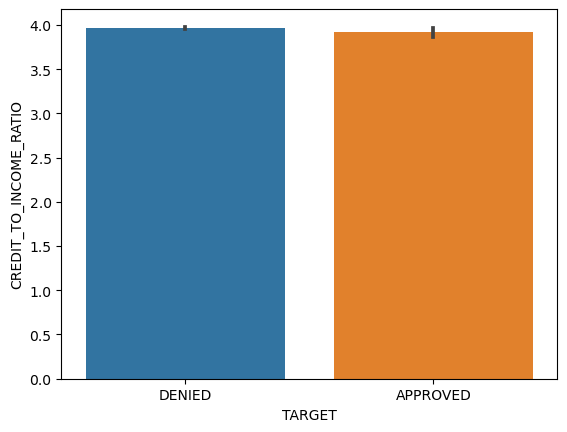

In [18]:
# Doing some feature extraction here from the data set to get ratios of the 'AMT_CREDIT' and 'AMT_INCOME_TOTAL' columns to see if there is a correlation between the two
df['CREDIT_TO_INCOME_RATIO'] = df['AMT_CREDIT'] / df['AMT_INCOME_TOTAL']

# using the 'CREDIT_TO_INCOME_RATIO' col to plot the amount of approved loans by the ratio of the credit to income
sns.barplot(x='TARGET', y='CREDIT_TO_INCOME_RATIO', data=df)

## `Plot 7`

<Axes: xlabel='AMT_ANNUITY', ylabel='AMT_CREDIT'>

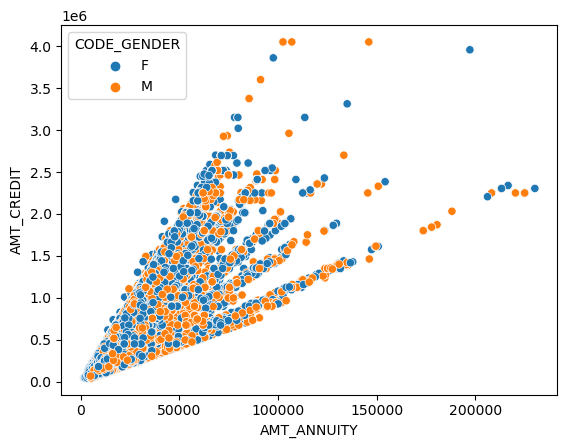

In [20]:
# doing two scatter plots a scatter plot based off the 'AMT_ANNUITY' and 'AMT_CREDIT' columns
sns.scatterplot(x='AMT_ANNUITY', y='AMT_CREDIT', data=df, hue='CODE_GENDER')

## `Plot 8`

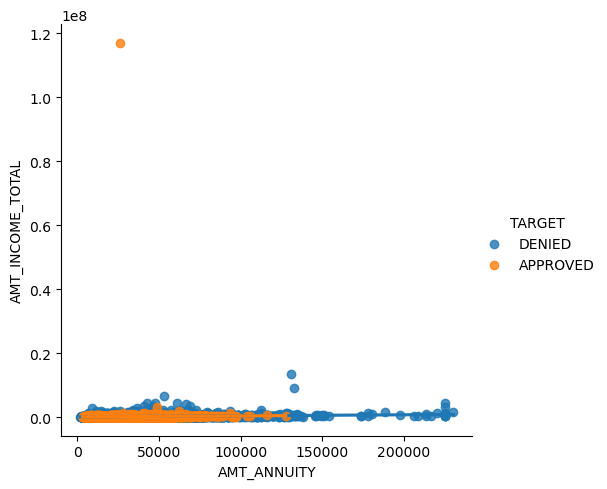

In [21]:
# Now doing it based off the 'AMT_ANNUITY' and 'AMT_INCOME_TOTAL' columns, but with a regression line and a hue of the 'TARGET' col
sns.lmplot(x='AMT_ANNUITY', y='AMT_INCOME_TOTAL', data=df, hue='TARGET')

In [22]:
# now getting the description of the data set
df.describe()

SK_ID_CURR   CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT  \
count  153755.000000  153755.000000      1.537550e+05  1.537550e+05   
mean   277867.616930       0.417398      1.692611e+05  5.988824e+05   
std    102831.742645       0.722523      3.180805e+05  4.023748e+05   
min    100004.000000       0.000000      2.565000e+04  4.500000e+04   
25%    188542.000000       0.000000      1.125000e+05  2.700000e+05   
50%    277749.000000       0.000000      1.462500e+05  5.135310e+05   
75%    366718.000000       1.000000      2.025000e+05  8.086500e+05   
max    456255.000000      19.000000      1.170000e+08  4.050000e+06   

         AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
count  153750.000000     1.536060e+05               153755.000000   
mean    27083.127015     5.383057e+05                    0.020813   
std     14468.883776     3.693544e+05                    0.013796   
min      1615.500000     4.500000e+04                    0.000290   
25%     16506.000000     2.385000e+05                    0.010006   
50%     24903.000000     4.500000e+05                    0.018850   
75%     34587.000000     6.795000e+05                    0.028663   
max    230161.500000     4.050000e+06                    0.072508   

          DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  ...  FLAG_DOCUMENT_20  \
count  153755.000000  153755.000000      153755.000000  ...     153755.000000   
mean   -16025.981438   63742.602751       -4985.077461  ...          0.000501   
std      4363.552861  141204.275368        3523.949015  ...          0.022373   
min    -25201.000000  -17583.000000      -24672.000000  ...          0.000000   
25%    -19662.000000   -2746.000000       -7485.000000  ...          0.000000   
50%    -15725.000000   -1211.000000       -4495.000000  ...          0.000000   
75%    -12399.000000    -290.000000       -2003.000000  ...          0.000000   
max     -7678.000000  365243.000000           0.000000  ...          1.000000   

       FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  \
count     153755.000000               132922.000000   
mean           0.000416                    0.006417   
std            0.020398                    0.084608   
min            0.000000                    0.000000   
25%            0.000000                    0.000000   
50%            0.000000                    0.000000   
75%            0.000000                    0.000000   
max            1.000000                    4.000000   

       AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
count              132922.000000               132922.000000   
mean                    0.006854                    0.034012   
std                     0.110151                    0.201581   
min                     0.000000                    0.000000   
25%                     0.000000                    0.000000   
50%                     0.000000                    0.000000   
75%                     0.000000                    0.000000   
max                     9.000000                    8.000000   

       AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
count              132922.000000              132922.000000   
mean                    0.265547                   0.267555   
std                     0.907185                   0.941286   
min                     0.000000                   0.000000   
25%                     0.000000                   0.000000   
50%                     0.000000                   0.000000   
75%                     0.000000                   0.000000   
max                    27.000000                 261.000000   

       AMT_REQ_CREDIT_BUREAU_YEAR  AMT_INCOME_GROUP  CREDIT_TO_INCOME_RATIO  
count               132922.000000     153755.000000           153755.000000  
mean                     1.901777          1.212442                3.962049  
std                      1.873638          3.203953                2.698995  
min                      0.000000          0.000000              

## `Plot 9`

<Axes: xlabel='DAYS_EMPLOYED', ylabel='AMT_CREDIT'>

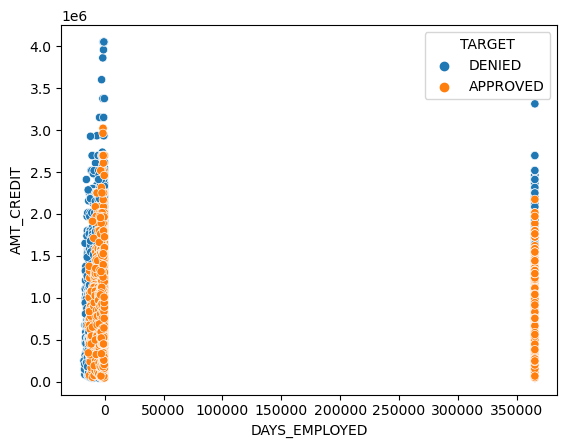

In [29]:
# plotting the days employed vs the amount of credit together with the target 
sns.scatterplot(x='DAYS_EMPLOYED', y='AMT_CREDIT', data=df, hue='TARGET')

## `Plot 10`

['DENIED' 'APPROVED']


C:\Users\tehwh\AppData\Local\Temp\ipykernel_16988\1390636616.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



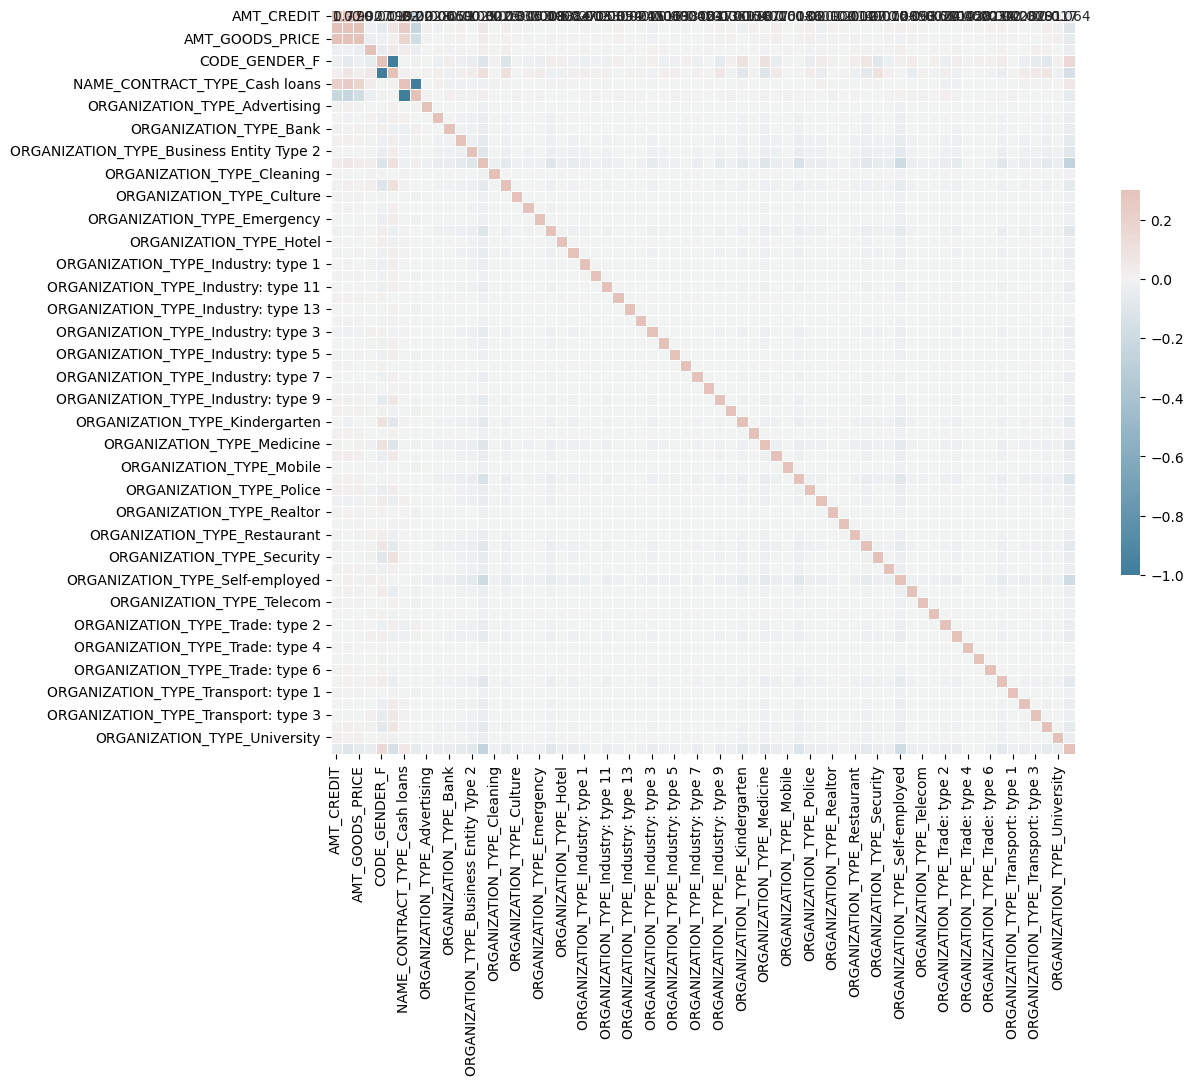

In [28]:
# making a correlation matrix 
data = df[['CODE_GENDER', 'NAME_CONTRACT_TYPE', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'ORGANIZATION_TYPE', 'TARGET']]
print(data['TARGET'].unique())
target_mapping = {'DENIED': 0, 'APPROVED': 1}
data['TARGET'] = data['TARGET'].map(target_mapping)
data_encoded = pd.get_dummies(data, columns=['CODE_GENDER', 'NAME_CONTRACT_TYPE', 'ORGANIZATION_TYPE'])
corr = data_encoded.corr()

# plotting
plt.figure(figsize=(12, 10))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()